## İmporting Library

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

## Loaded Data

In [2]:
advertising = pd.read_csv("Advertising.csv")
df = advertising.copy()
df.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


## Visulation

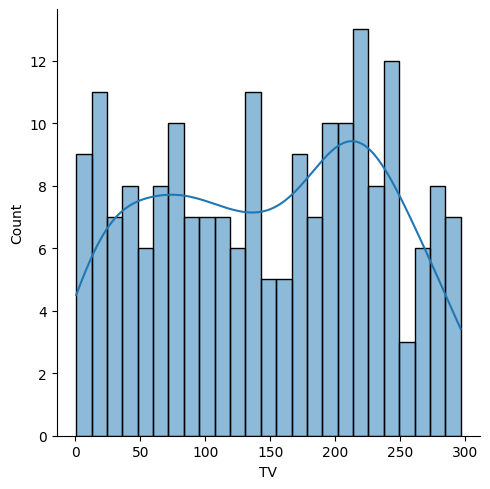

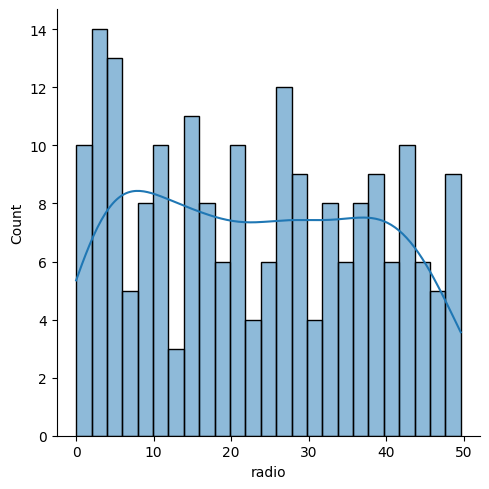

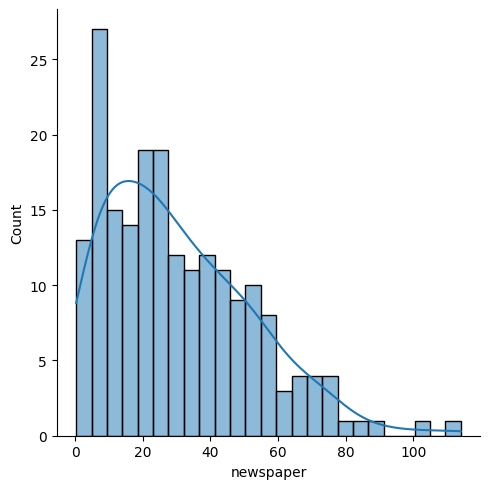

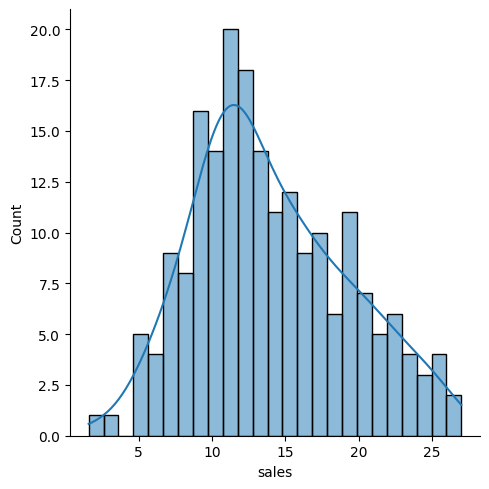

In [3]:
for i in df :
    sns.displot(df[i] , bins = 25 , kde = True )

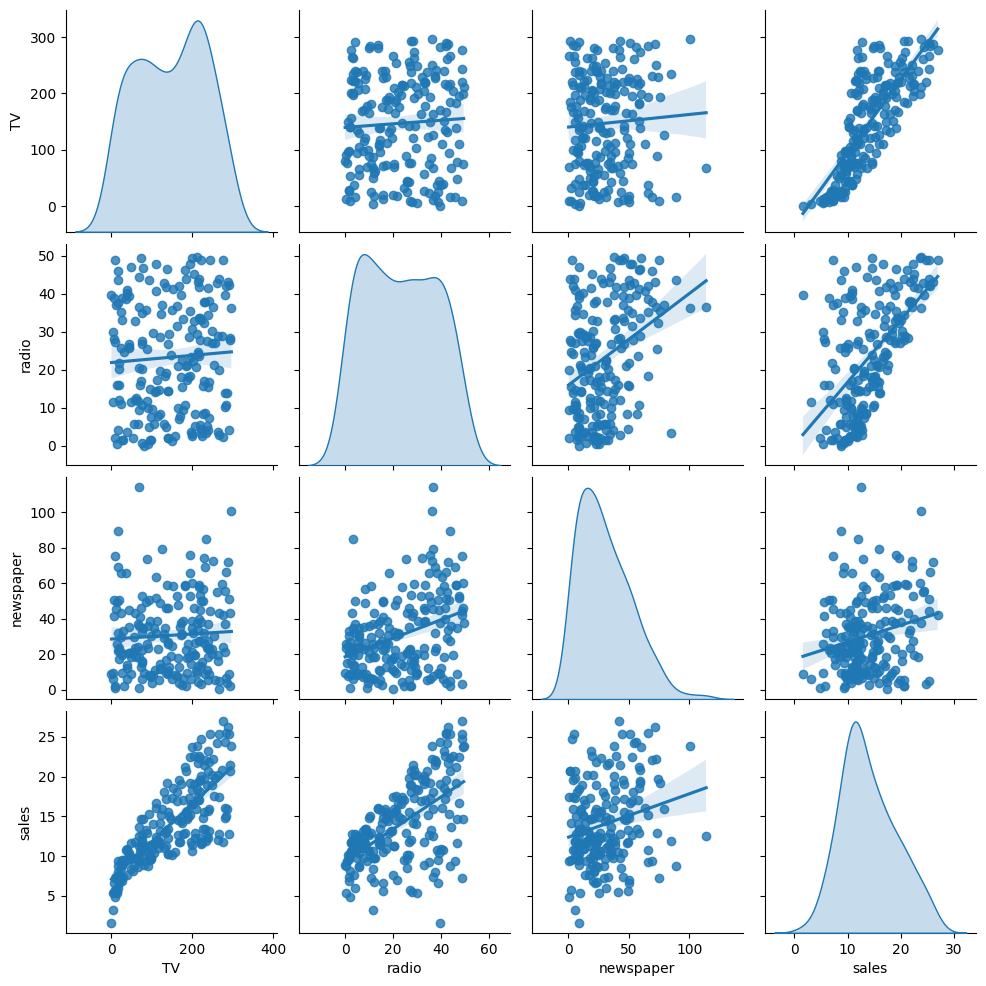

In [4]:
sns.pairplot(df , kind = "reg" , diag_kind = "kde" )

<Axes: >

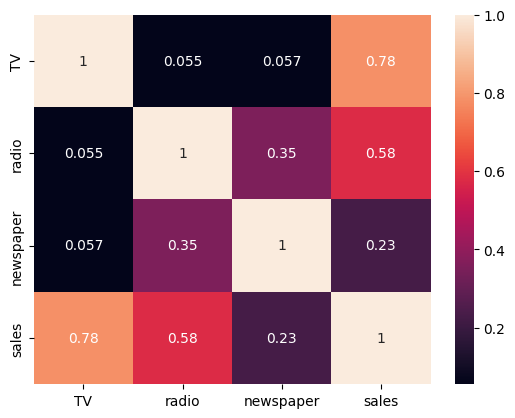

In [5]:
sns.heatmap(df.corr() , annot = True)

## Train | Test Split

In [6]:
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score 
from sklearn.linear_model import LinearRegression

x = df.drop("sales" , axis = 1)
y = df.sales

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=61)

lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

## Model Evaluation 
- Linear Regression

In [7]:
from sklearn.metrics import mean_absolute_error ,r2_score , mean_squared_error , confusion_matrix , accuracy_score

y_pred = lr.predict(x_test)

r2 = r2_score(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mean_squared_error(y_test, lr.predict(x_test)))

In [8]:
print("r2 : " , {r2} , "," , 
      "mae : " , {mae} , "," ,
      "mse : "  , {mse} , "," ,
      "rmse : ", {rmse})

r2 :  {0.8801295028531632} , mae :  {1.1380825268425534} , mse :  {2.004411521278403} , rmse :  {1.4157724115402175}


## Cross_Vall_Score

In [9]:
cross_val_score(lr, x_train, y_train, cv = 5, scoring = "r2").mean()

0.872578377060848

In [10]:
y_pred =np.array(y_pred)

<Axes: ylabel='sales'>

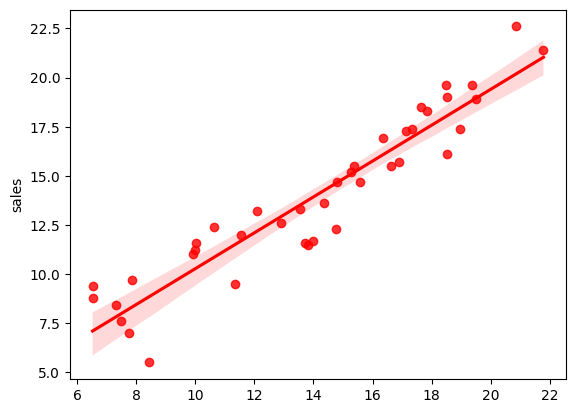

In [11]:
sns.regplot(data = df , x = y_pred, y = y_test , color = "red")

## KNN Regression

In [12]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor().fit(x_train , y_train)
y_pred = knn_model.predict(x_test)

print("n_neighbors : " , knn_model.n_neighbors)
print("mse : " , mean_squared_error(y_test , y_pred))
print("mae : " , (mean_absolute_error(y_test , y_pred)))
print("r2 : " , (r2_score(y_test , y_pred)))
print("rmse : " , np.sqrt(mean_squared_error(y_test, knn_model.predict(x_test))))

n_neighbors :  5
mse :  1.8112100000000013
mae :  1.0495000000000005
r2 :  0.8916835984863775
rmse :  1.3458120225350945


## KNN Regression Tuned

In [13]:
from sklearn.model_selection import GridSearchCV

knn_params = {'n_neighbors': np.arange(1,30,1)}

knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 5)
knn_cv_model.fit(x_train, y_train)
knn_cv_model.best_params_["n_neighbors"]


## Tuned

RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(x_train, y_train)
    y_pred = knn_model.predict(x_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, x_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])
knn_tuned.fit(x_train , y_train)
print("\n\n" , np.sqrt(mean_squared_error(y_test, knn_tuned.predict(x_test))))
r2_score(y_test , y_pred = knn_tuned.predict(x_test))

k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  1.7150255100143552
k = 2 için RMSE değeri:  0.8304366321399846 RMSE_CV değeri:  1.6389449731458345
k = 3 için RMSE değeri:  1.0579001738244387 RMSE_CV değeri:  1.6020538033689409
k = 4 için RMSE değeri:  1.167519405620309 RMSE_CV değeri:  1.711821261478546
k = 5 için RMSE değeri:  1.2788500693982856 RMSE_CV değeri:  1.705885400605797
k = 6 için RMSE değeri:  1.3044887781127983 RMSE_CV değeri:  1.7734666694860035
k = 7 için RMSE değeri:  1.3783160385197641 RMSE_CV değeri:  1.8716214458951612
k = 8 için RMSE değeri:  1.44069753071212 RMSE_CV değeri:  1.9449707280091646
k = 9 için RMSE değeri:  1.547654288365556 RMSE_CV değeri:  2.011248268803589
k = 10 için RMSE değeri:  1.6452309868222152 RMSE_CV değeri:  2.0704255299334


 1.2783778784068507


0.902266396953618

## Random Forests Regression 

In [14]:
from sklearn.ensemble import RandomForestRegressor
 
rf = RandomForestRegressor()
rf.fit(x_train , y_train)
rf.predict(x_test)
print("RandomForest Model 'MSE' : " , np.sqrt(mean_squared_error(y_test, rf.predict(x_test))))

# Model Tuned 

rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 300 , 500]}

rf_model = RandomForestRegressor(random_state = 61)

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

rf_cv_model.fit(x_train, y_train)
print("RandomForest Tuned Model 'MSE' : " , np.sqrt(mean_squared_error(y_test, rf_cv_model.predict(x_test))))

RandomForest Model 'MSE' :  0.6054242314278492
RandomForest Tuned Model 'MSE' :  0.6348383485498543


In [15]:
print(rf_cv_model.best_params_)

rf_model_tuned = RandomForestRegressor(n_estimators=300 , max_features= 3 , max_depth= 9)
rf_model_tuned.fit(x_train , y_train)
rf_model_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test , rf_model_tuned.predict(x_test)))



{'max_depth': 9, 'max_features': 3, 'n_estimators': 300}


0.6127595188950825

## XGBoost Regression

In [28]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(x_train , y_train)
y_pred_xgb = xgb.predict(x_test)
print("XGBoost Regressor 'MSE' : " , np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

##Model Tuned

xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]}


xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)

xgb_cv.fit(x_train, y_train)

print("XGBoost Regressor Best Params : " , xgb_cv.best_params_)


XGBoost Regressor 'MSE' :  0.5212327864941164
Fitting 10 folds for each of 300 candidates, totalling 3000 fits
XGBoost Regressor Best Params :  {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000}


In [36]:
y_pred_xgb_tuned = xgb_cv.predict(x_test)
print("Tuned XGBoost Regressor 'MSE' : " , np.sqrt(mean_squared_error(y_test , y_pred_xgb_tuned)))

## Final XGBoost Regressor : 

xgb_final = XGBRegressor(colsample_bytree = 1, learning_rate =  0.01, max_depth = 4, n_estimators = 1000).fit(x_train , y_train)
y_pred_xgb_final = xgb_final.predict(x_test)
print("Fİnal XGBoost Regressor 'MSE' : " , np.sqrt(mean_squared_error(y_test , y_pred_xgb_final)))


Tuned XGBoost Regressor 'MSE' :  0.541153311380163
Fİnal XGBoost Regressor 'MSE' :  0.541153311380163
